In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df=pd.read_csv('train-chennai-sale.csv')
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [ ]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

#FILLING NULL VALUES

In [3]:
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0])
df['N_BEDROOM']=df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0])
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())

In [ ]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [ ]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

#CHANGING DATATYPES

In [4]:
df.DATE_SALE= pd.to_datetime(df.DATE_SALE, format='%d-%m-%Y')
df.DATE_BUILD=pd.to_datetime(df.DATE_BUILD,format='%d-%m-%Y')
df.N_BEDROOM=df.N_BEDROOM.astype("int64")
df.N_BATHROOM=df.N_BATHROOM.astype("int64")

In [ ]:
df.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

#CHECKING SPELLING MISTAKES

In [ ]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
df.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

#CORRECTED SPELLING

In [5]:
df['SALE_COND']=df['SALE_COND'].replace(['Ab Normal', 'Partiall', 'AdjLand', 'PartiaLl'],['AbNormal', 'Partial', 'Adj Land', 'Partial'])
df['STREET']=df['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'])
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace(['NoSewr ', 'NoSeWa','AllPub'],['No sewar','No sewage','All Pub'])
df['BUILDTYPE']=df['BUILDTYPE'].replace(['Commercial', 'Others', 'Other', 'House', 'Comercial'],['Commercial', 'Others', 'Others', 'House', 'Commercial'])
df['PARK_FACIL']=df['PARK_FACIL'].replace(['Yes', 'No', 'Noo'],['Yes', 'No', 'No'])
df['AREA']=df['AREA'].replace(['TNagar','Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar','KKNagar'],['T Nagar','Chrompet','Chrompet','Karapakkam','Anna Nagar','Chrompet','Adyar','Velachery','Anna Nagar','KK Nagar' ])

In [ ]:
df.SALE_COND.value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [ ]:
df.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [ ]:
df.UTILITY_AVAIL.value_counts()

All Pub      1887
No sewage    1871
No sewar     1829
ELO          1522
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [ ]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [ ]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

#CREATING NEW FEATURE

In [6]:
df['build']=df['DATE_BUILD'].dt.year
df['sale']=df['DATE_SALE'].dt.year

In [7]:
df['House_Age']=df['sale']-df['build']
df['House_Age']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: House_Age, Length: 7109, dtype: int64

#DETECTING OUTLIER

In [ ]:
df.INT_SQFT.describe()
df.DIST_MAINROAD.describe()
df.N_BEDROOM.describe()
df.N_BATHROOM.describe()
df.N_ROOM.describe()
df.QS_ROOMS.describe()
df.QS_OVERALL.describe()
df.SALES_PRICE.describe()

No outlier detected

#DELETE UNWANTED(CONTAINS NO INFO) COLUMNS

In [8]:
df=df.drop(columns=['build','sale','DATE_SALE','DATE_BUILD','PRT_ID','REG_FEE','COMMIS'])

In [9]:
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,House_Age
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3,2,5,Family,No,Others,No sewar,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,Adj Land,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,49
7105,Velachery,1897,52,3,2,5,Family,Yes,Others,No sewage,No Access,RH,3.6,4.5,3.3,3.920,10818480,9
7106,Velachery,1614,152,2,1,4,Normal Sale,No,House,No sewage,Gravel,I,4.3,4.2,2.9,3.840,8351410,28
7107,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,32


#EDA- Distribution of features Continuous

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
numerical=df.dtypes[df.dtypes!='O'].index
numerical

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE',
       'House_Age'],
      dtype='object')

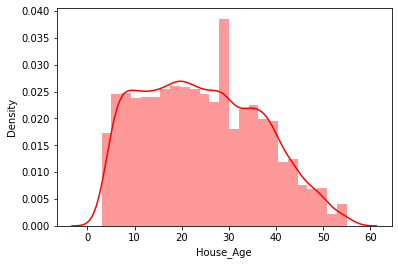

In [ ]:
sns.distplot(df.House_Age,color='r')

1)Follows uniform distribution. 2)No skew in data.

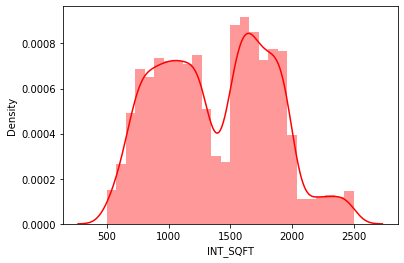

In [ ]:
sns.distplot(df.INT_SQFT,color='r')

1)No uniform distribution 2)No skew in data

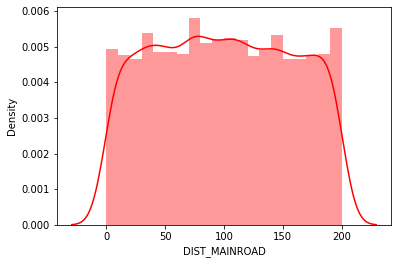

In [ ]:
sns.distplot(df['DIST_MAINROAD'],color='r')

1)Follows uniform distribution 2)No skew in data

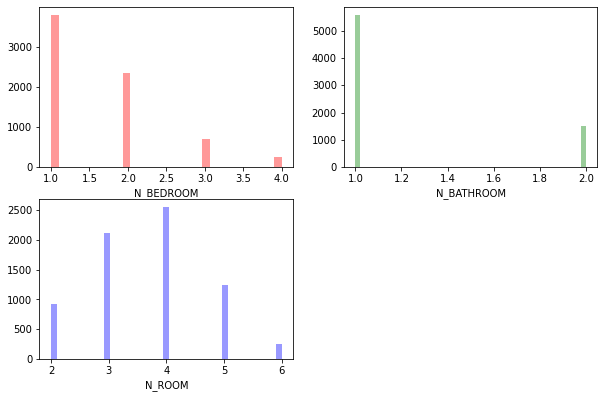

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(321)
sns.distplot(df.N_BEDROOM,color='r',kde=False)

plt.subplot(322)
sns.distplot(df.N_BATHROOM,color='g',kde=False)

plt.subplot(323)
sns.distplot(df.N_ROOM,color='b',kde=False)

Majority of house having 1 Bedroom and 1 Bathroom.

#EDA- Distribution of features CATEGORICAL

In [10]:
cat=[ x for x in df.columns if df[x].dtypes=='O']
cat

['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

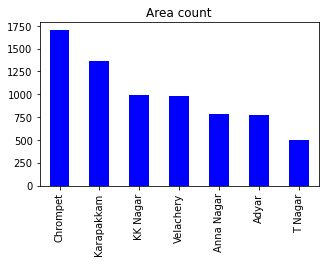

In [11]:
plt.figure(figsize=(5,3))
plt.title("Area count")
df.AREA.value_counts().plot(kind='bar',color='blue')
plt.xticks(rotation='vertical')
plt.show()

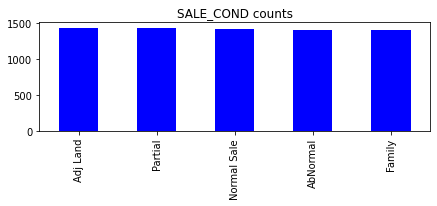

In [12]:
plt.figure(figsize=(7,2))
plt.title("SALE_COND counts")
df.SALE_COND.value_counts().plot(kind='bar',color='blue')
plt.xticks(rotation='vertical')
plt.show()

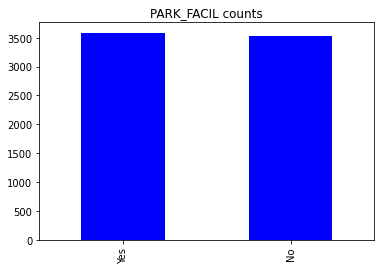

In [13]:
plt.figure(figsize=(6,4))
plt.title("PARK_FACIL counts")
df.PARK_FACIL.value_counts().plot(kind='bar',color='blue')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
import plotly.express as px
plt.figure(figsize=(7,7))
value=df.BUILDTYPE.value_counts()
name=df.BUILDTYPE.unique()
fig=px.pie(df,values=value,names=name,color_discrete_sequence=px.colors.sequential.RdBu,title='Distribution of buildtype')
fig

<Figure size 504x504 with 0 Axes>

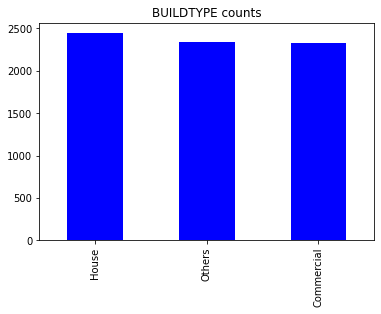

In [14]:
plt.figure(figsize=(6,4))
plt.title("BUILDTYPE counts")
df.BUILDTYPE.value_counts().plot(kind='bar',color='blue')
plt.xticks(rotation='vertical')
plt.show()

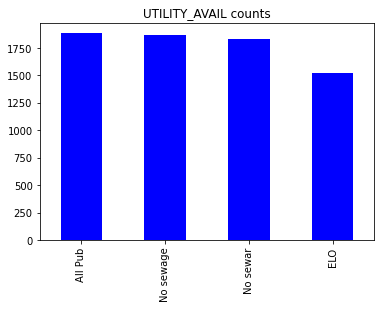

In [15]:
plt.figure(figsize=(6,4))
plt.title("UTILITY_AVAIL counts")
df.UTILITY_AVAIL.value_counts().plot(kind='bar',color='blue')
plt.xticks(rotation='vertical')
plt.show()

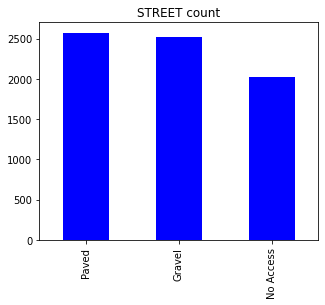

In [16]:
plt.figure(figsize=(5,4))
plt.title("STREET count")
df.STREET.value_counts().plot(kind='bar',color='blue')
plt.xticks(rotation='vertical')
plt.show()

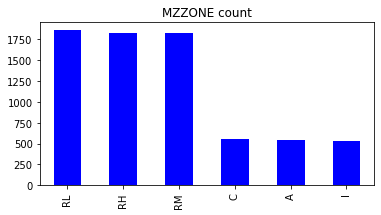

In [17]:
plt.figure(figsize=(6,3))
plt.title("MZZONE count")
df.MZZONE.value_counts().plot(kind='bar',color='blue')
plt.xticks(rotation='vertical')
plt.show()

#feature VS target CATEGORICAL

Text(0.5, 1.0, 'MZZONE VS Sales price')

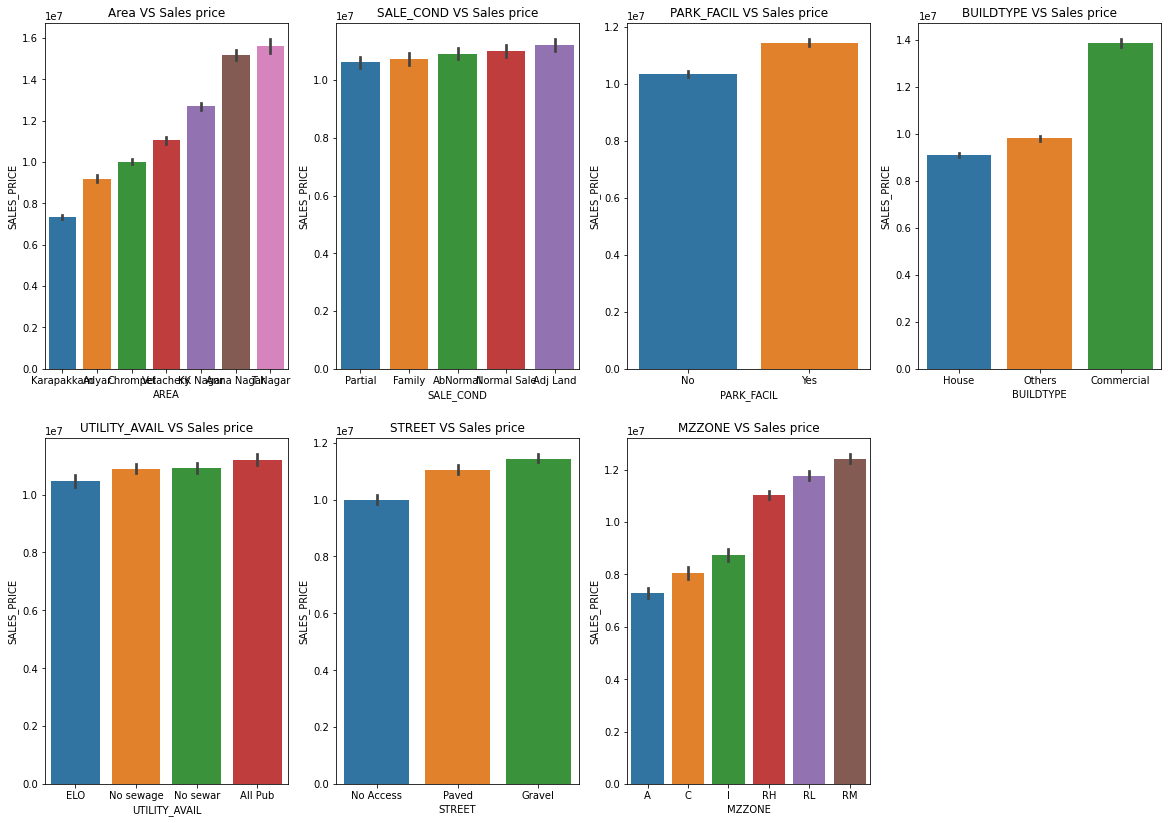

In [ ]:
plt.figure(figsize=(20,14))
plt.subplot(241)
sns.barplot(x=df['AREA'],y=df['SALES_PRICE'],order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('Area VS Sales price')

plt.subplot(242)
sns.barplot(x=df['SALE_COND'],y=df['SALES_PRICE'],order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('SALE_COND VS Sales price')

plt.subplot(243)
sns.barplot(x=df['PARK_FACIL'],y=df['SALES_PRICE'],order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('PARK_FACIL VS Sales price')

plt.subplot(244)
sns.barplot(x=df['BUILDTYPE'],y=df['SALES_PRICE'],order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('BUILDTYPE VS Sales price')

plt.subplot(245)
sns.barplot(x=df['UTILITY_AVAIL'],y=df['SALES_PRICE'],order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('UTILITY_AVAIL VS Sales price')

plt.subplot(246)
sns.barplot(x=df['STREET'],y=df['SALES_PRICE'],order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('STREET VS Sales price')

plt.subplot(247)
sns.barplot(x=df['MZZONE'],y=df['SALES_PRICE'],order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('MZZONE VS Sales price')

1)AREA--Follows linear relationship,do LABEL encoding
2)SALE_COND--slight linear relationship,do LABEL encoding
3)parking_faci--binary cat,do label encoding
4)build_type--no linear relationship,do one-hot encoder
5)utility_avail--linear,do label encoding
6)street--linear,do label encode
7)mzzone--almost linear,do label encoding

#Feature VS Target CONTINUOUS

Text(0.5, 1.0, 'INT_SQFT VS Sales price')

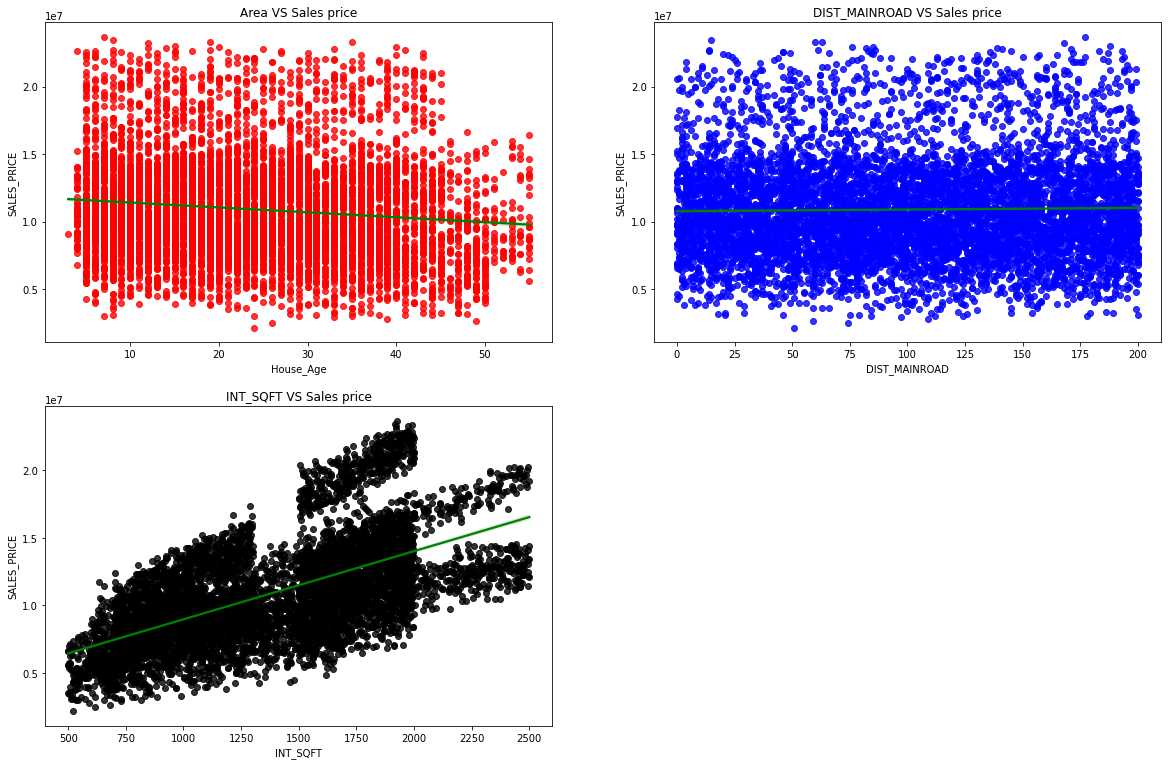

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.regplot(x=df['House_Age'],y=df['SALES_PRICE'],scatter_kws={"color":"red"}, line_kws={"color":"green"})
plt.title("Area VS Sales price")

plt.subplot(322)
sns.regplot(x=df['DIST_MAINROAD'],y=df['SALES_PRICE'],scatter_kws={"color":"blue"}, line_kws={"color":"green"})
plt.title("DIST_MAINROAD VS Sales price")

plt.subplot(323)
sns.regplot(x=df['INT_SQFT'],y=df['SALES_PRICE'],scatter_kws={"color":"black"}, line_kws={"color":"green"})
plt.title("INT_SQFT VS Sales price")


1)INT_SQFT--good linear relationship,no transform required
2)House_Age--age increases price decreases,slight linear relationship
3)DIST_MAINROAD--no relationship,drop

Text(0.5, 1.0, 'N_ROOM VS Sales price')

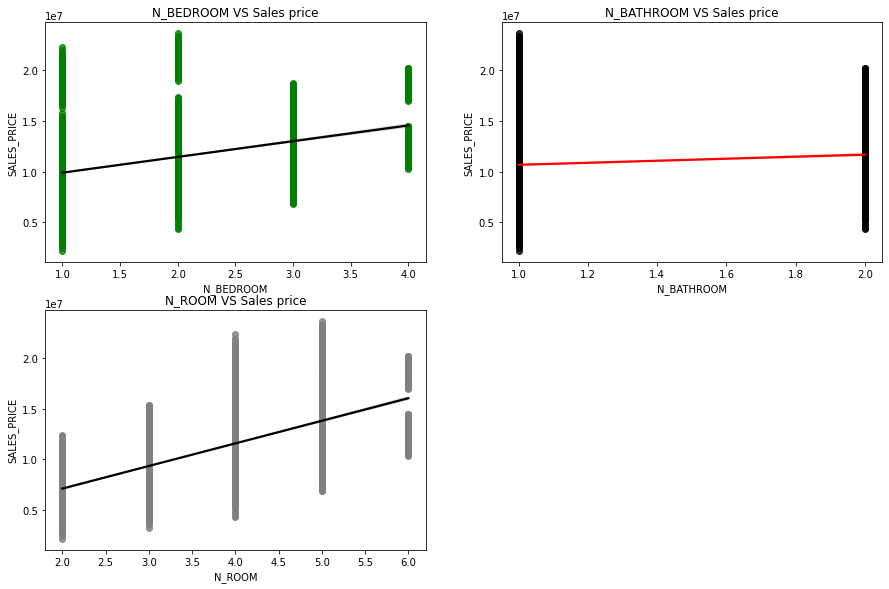

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(321)
sns.regplot(x=df['N_BEDROOM'],y=df['SALES_PRICE'],scatter_kws={"color":"green"}, line_kws={"color":"black"})
plt.title("N_BEDROOM VS Sales price")

plt.subplot(322)
sns.regplot(x=df['N_BATHROOM'],y=df['SALES_PRICE'],scatter_kws={"color":"black"}, line_kws={"color":"red"})
plt.title("N_BATHROOM VS Sales price")

plt.subplot(323)
sns.regplot(x=df['N_ROOM'],y=df['SALES_PRICE'],scatter_kws={"color":"grey"}, line_kws={"color":"black"})
plt.title("N_ROOM VS Sales price")

Text(0.5, 1.0, 'N_ROOM VS SALES_PRICE')

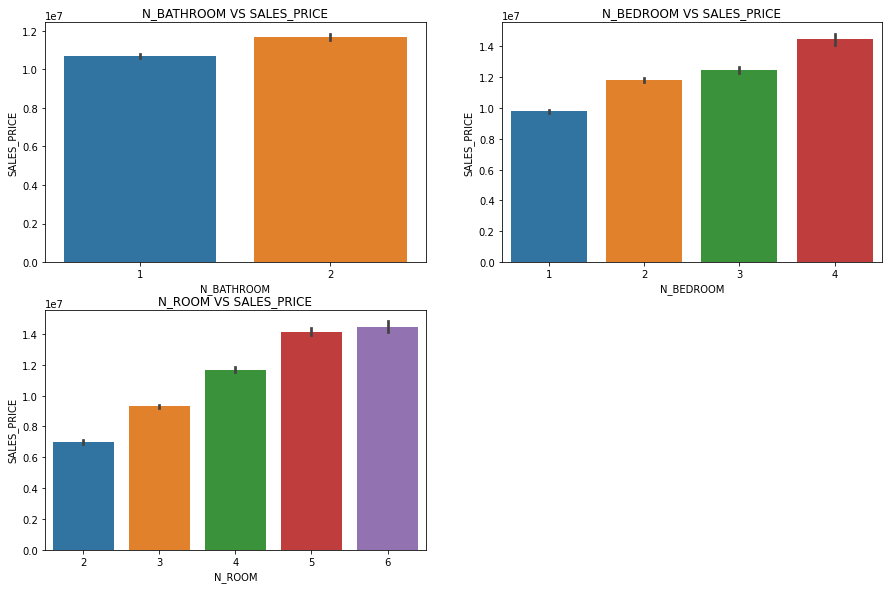

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(321)
sns.barplot(x=df['N_BATHROOM'],y=df['SALES_PRICE'],order=df.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM'])
plt.title("N_BATHROOM VS SALES_PRICE")

plt.subplot(322)
sns.barplot(x=df['N_BEDROOM'],y=df['SALES_PRICE'],order=df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM'])
plt.title("N_BEDROOM VS SALES_PRICE")

plt.subplot(323)
sns.barplot(x=df['N_ROOM'],y=df['SALES_PRICE'],order=df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'])
plt.title("N_ROOM VS SALES_PRICE")


linear relationship,no transform required

Text(0.5, 1.0, 'QS_OVERALL VS Sales price')

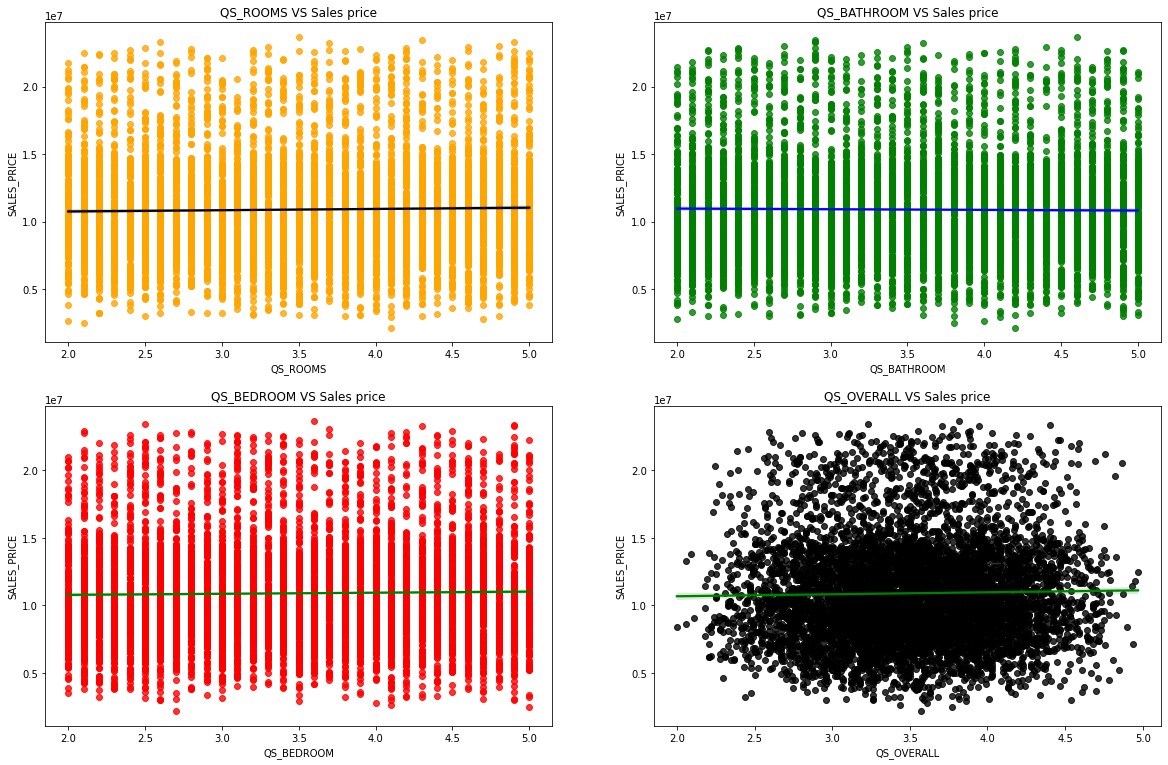

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.regplot(x=df['QS_ROOMS'],y=df['SALES_PRICE'],scatter_kws={"color":"orange"}, line_kws={"color":"black"})
plt.title("QS_ROOMS VS Sales price")

plt.subplot(322)
sns.regplot(x=df['QS_BATHROOM'],y=df['SALES_PRICE'],scatter_kws={"color":"green"}, line_kws={"color":"blue"})
plt.title("QS_BATHROOM VS Sales price")

plt.subplot(323)
sns.regplot(x=df['QS_BEDROOM'],y=df['SALES_PRICE'],scatter_kws={"color":"red"}, line_kws={"color":"green"})
plt.title("QS_BEDROOM VS Sales price")

plt.subplot(324)
sns.regplot(x=df['QS_OVERALL'],y=df['SALES_PRICE'],scatter_kws={"color":"black"}, line_kws={"color":"green"})
plt.title("QS_OVERALL VS Sales price")

no relationship,drop

In [18]:
df=df.drop(columns=['QS_ROOMS',	'QS_BATHROOM','QS_BEDROOM',	'QS_OVERALL','DIST_MAINROAD'])

In [19]:
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,House_Age
0,Karapakkam,1004,1,1,3,AbNormal,Yes,Commercial,All Pub,Paved,A,7600000,44
1,Anna Nagar,1986,2,1,5,AbNormal,No,Commercial,All Pub,Gravel,RH,21717770,11
2,Adyar,909,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,13159200,20
3,Velachery,1855,3,2,5,Family,No,Others,No sewar,Paved,I,9630290,22
4,Karapakkam,1226,1,1,3,AbNormal,Yes,Others,All Pub,Gravel,C,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,1,1,2,Adj Land,No,Others,ELO,No Access,RM,5353000,49
7105,Velachery,1897,3,2,5,Family,Yes,Others,No sewage,No Access,RH,10818480,9
7106,Velachery,1614,2,1,4,Normal Sale,No,House,No sewage,Gravel,I,8351410,28
7107,Karapakkam,787,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,8507000,32


#label encoding

In [20]:
df['AREA']=df['AREA'].map({'Karapakkam':1,'Adyar':2,'Chrompet':3,'Velachery':4,'KK Nagar':5,'Anna Nagar':6,'T Nagar':7})
df['SALE_COND']=df['SALE_COND'].map({'Partial':1,'Family':2,'AbNormal':3,'Normal Sale':4, 'Adj Land':5})
df['PARK_FACIL']=df['PARK_FACIL'].map({'Yes':1, 'No':0})
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].map({'ELO':1,'No sewage':2,'No sewar':3,'All Pub':4})
df['STREET']=df['STREET'].map({'No Access':1,'Paved':2,'Gravel':3})
df['MZZONE']=df['MZZONE'].map({'A':1,'C':2,'I':3,'RH':4,'RL':5,'RM':6})

#ONE HOT ENCODE

In [21]:
build_type=pd.get_dummies(df['BUILDTYPE'])

In [22]:
df=pd.concat([df,build_type],axis=1)
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,House_Age,Commercial,House,Others
0,1,1004,1,1,3,3,1,Commercial,4,2,1,7600000,44,1,0,0
1,6,1986,2,1,5,3,0,Commercial,4,3,4,21717770,11,1,0,0
2,2,909,1,1,3,3,1,Commercial,1,3,5,13159200,20,1,0,0
3,4,1855,3,2,5,2,0,Others,3,2,3,9630290,22,0,0,1
4,1,1226,1,1,3,3,1,Others,4,3,2,7406250,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,1,1,2,5,0,Others,1,1,6,5353000,49,0,0,1
7105,4,1897,3,2,5,2,1,Others,2,1,4,10818480,9,0,0,1
7106,4,1614,2,1,4,4,0,House,2,3,3,8351410,28,0,1,0
7107,1,787,1,1,2,1,1,Commercial,1,2,5,8507000,32,1,0,0


In [23]:
df=df.drop(columns=['BUILDTYPE'])

In [24]:
df.dtypes

AREA             int64
INT_SQFT         int64
N_BEDROOM        int64
N_BATHROOM       int64
N_ROOM           int64
SALE_COND        int64
PARK_FACIL       int64
UTILITY_AVAIL    int64
STREET           int64
MZZONE           int64
SALES_PRICE      int64
House_Age        int64
Commercial       uint8
House            uint8
Others           uint8
dtype: object

#LINEAR REG

In [25]:
x=df.drop("SALES_PRICE",axis='columns')
y=df['SALES_PRICE']

In [26]:
x

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,House_Age,Commercial,House,Others
0,1,1004,1,1,3,3,1,4,2,1,44,1,0,0
1,6,1986,2,1,5,3,0,4,3,4,11,1,0,0
2,2,909,1,1,3,3,1,1,3,5,20,1,0,0
3,4,1855,3,2,5,2,0,3,2,3,22,0,0,1
4,1,1226,1,1,3,3,1,4,3,2,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,1,1,2,5,0,1,1,6,49,0,0,1
7105,4,1897,3,2,5,2,1,2,1,4,9,0,0,1
7106,4,1614,2,1,4,4,0,2,3,3,28,0,1,0
7107,1,787,1,1,2,1,1,1,2,5,32,1,0,0


spliting

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [30]:
x_train.shape,x_test.shape

((5687, 14), (1422, 14))

scale

In [31]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(x_train,y_train) 
X_train = scaler.transform(x_train) 
X_test = scaler.transform(x_test) 

Model training

In [32]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [33]:
print(regression.intercept_) #c

10925361.342535608


In [34]:
print(regression.coef_) #m

[ 1074429.2796489    645590.37103045 -1277319.97438885   115222.81947859
  1772381.69234244   225365.59418663   524990.03344274    56309.7368242
   402833.27003781   867939.59500443  -219331.33224803  1354403.22220117
  -847350.02559477  -502912.9322526 ]


In [35]:
y_pred=regression.predict(X_test)
y_pred

array([14133285.51380391, 13497049.32422296, 18560594.10600343, ...,
       13886968.43919666, 15786348.1929131 ,  7973964.07237349])

In [36]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
3913,13376150,1.413329e+07
2726,12857440,1.349705e+07
6220,19124310,1.856059e+07
2716,4905000,4.359749e+06
5459,13534450,1.306355e+07
...,...,...
3524,9987005,1.020682e+07
3010,5821000,6.173330e+06
66,13364730,1.388697e+07
1642,17115030,1.578635e+07


evaluation metrics

In [37]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9259684633137117



LIES BETWEEN 0 to 1 AND GOOD MODEL.

#kNN-K nearest neighbor 

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i) 
  knn.fit(X_train,y_train) 
  print("K value  : " , i," Train Accuracy : ", knn.score(X_train,y_train), " score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))


K value  :  1  Train Accuracy :  1.0  score :  0.9230172275844343
K value  :  2  Train Accuracy :  0.9814026125650397  score :  0.9422663730635309
K value  :  3  Train Accuracy :  0.9756304661478516  score :  0.9477089056634507
K value  :  4  Train Accuracy :  0.9714857796984424  score :  0.9490880048770309
K value  :  5  Train Accuracy :  0.9686954049822738  score :  0.9494911461441669
K value  :  6  Train Accuracy :  0.9664909633750627  score :  0.9490931346016289
K value  :  7  Train Accuracy :  0.9638898191507578  score :  0.9486579576692025
K value  :  8  Train Accuracy :  0.9621346440620739  score :  0.9469320681638431
K value  :  9  Train Accuracy :  0.9600600143204786  score :  0.9458060212609496
K value  :  10  Train Accuracy :  0.9580617037477966  score :  0.9445703864985836
K value  :  20  Train Accuracy :  0.9439332877038132  score :  0.9334372266665591
K value  :  50  Train Accuracy :  0.9166931678680944  score :  0.909307083174595


 k=5.Higher the score better the k.

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  model = KNeighborsRegressor(i) 
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  mse=sqrt(mean_squared_error(y_test,y_pred))
  print("K value  : " , i, " error is : ", mse)

In [39]:
knn_pred=knn.predict(X_test)
knn_pred

array([12809625.2, 12626837.6, 19003635. , ..., 14041177.8, 16919890.4,
        8119794.8])

In [ ]:
#def knn_comparison(data, k): #k and the data are input to the function
 #x=df.drop("SALES_PRICE",axis='columns')
 #y=df['SALES_PRICE']  # y -> target/true labels 
 #from sklearn.neighbors import KNeighborsRegressor
 #from sklearn.model_selection import cross_val_score
 #from mlxtend.plotting import plot_decision_regions 
 #for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
 # knn = KNeighborsRegressor(i) 
  #knn.fit(X_train,y_train) 
  #print("K value  : " , i," Train Accuracy : ", knn.score(X_train,y_train), " score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))
 #plot_decision_regions(x_train, y_train, clf=knn, legend=2) # it plots the decision boundary


evaluation

In [40]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,knn_pred))

R2- SCORE: 0.9147972080142935


Good r2 score.

#Decision tree

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred=dt.predict(X_test)
dt_pred

array([13738350., 12459280., 19376950., ..., 14086140., 17991120.,
        8410150.])

In [42]:
from sklearn.metrics import  r2_score
rsquared = r2_score(y_test,dt_pred)
print("R2 of dt: {:.2f}".format(rsquared))

R2 of dt: 0.98


setting depth

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeRegressor(max_depth=depth) 
  dt.fit(X_train, y_train)  
  trainAccuracy = r2_score(y_train, dt.predict(X_train)) 
  dt = DecisionTreeRegressor(max_depth=depth) 
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10, scoring = make_scorer(r2_score)) 
  print('depth is:', depth,'training acc', trainAccuracy,'score', np.mean(valAccuracy))

depth is: 1 training acc 0.36345605867188013 score 0.36162036447194124
depth is: 2 training acc 0.6816800365079163 score 0.6805303832546072
depth is: 3 training acc 0.8045597243268386 score 0.8031246307797796
depth is: 4 training acc 0.8874015748201463 score 0.882861727175345
depth is: 5 training acc 0.922369797446146 score 0.9150423044010585
depth is: 6 training acc 0.944328232459664 score 0.9359431777571856
depth is: 7 training acc 0.9599455521074666 score 0.9504734548714386
depth is: 8 training acc 0.9727730063700479 score 0.9593374307858094
depth is: 9 training acc 0.9825704309167158 score 0.9659766889507366
depth is: 10 training acc 0.9895180275227247 score 0.9689431212892374
depth is: 20 training acc 0.9999996856901062 score 0.9715330030772404


In [44]:
dt.fit(X_train, y_train)
dt_pred=dt.predict(X_test)

depth=20

In [45]:
from sklearn.metrics import  r2_score
rsquared = r2_score(y_test,dt_pred)
print("R2 of dt: {:.2f}".format(rsquared))

R2 of dt: 0.97


Good r2 score.

[(0.48663598864137464, 'AREA'),
 (0.11397226111812403, 'INT_SQFT'),
 (0.00020321427778106812, 'N_BEDROOM'),
 (0.0008823629780908368, 'N_BATHROOM'),
 (8.212531070348454e-05, 'N_ROOM'),
 (0.0026019376849246247, 'SALE_COND'),
 (0.01530988878124298, 'PARK_FACIL'),
 (0.0014260024780383567, 'UTILITY_AVAIL'),
 (0.011405072833264555, 'STREET'),
 (0.03891316824758755, 'MZZONE'),
 (0.005008787669301678, 'House_Age'),
 (0.3182239778361386, 'Commercial'),
 (0.003643469868231317, 'House'),
 (0.0016917422751961714, 'Others')]

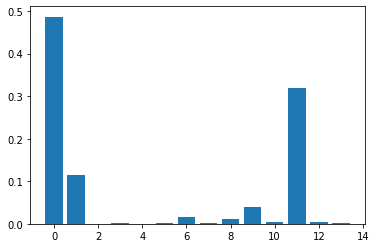

In [ ]:
importance=dt.feature_importances_
pyplot.bar([x for x in range(len(importance))],importance)
list(zip(importance,x_test.columns))

Area,Commercial,n_room has the high feature importance.

In [ ]:
from matplotlib import pyplot
dt = DecisionTreeRegressor(max_depth = 20)
X_train = x_train.loc[:,['AREA','Commercial']]
X_test = x_test.loc[:,['AREA','Commercial']]
dt.fit(X_train, y_train)
r2_score(dt.predict(X_test),y_test)

0.7799769432312899

#RANDOM FOREST

In [ ]:
x.shape

(7109, 14)

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators= 100, max_depth = 4, max_features='sqrt')
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=4, max_features='sqrt')

In [47]:
rf_pred=rf.predict(x_test)
rf_pred

array([11750691.60390026, 12737541.80664219, 17027529.53032754, ...,
       12469389.73800738, 16477689.40757544,  8656265.92719012])

In [48]:
print('R2- SCORE:', metrics.r2_score(y_test,rf_pred))

R2- SCORE: 0.864830953150048


Good r2 score.

In [ ]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance,2)) for feature, importance in zip(x_train, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: AREA                 Importance: 0.25
Variable: Commercial           Importance: 0.22
Variable: INT_SQFT             Importance: 0.18
Variable: N_ROOM               Importance: 0.11
Variable: House                Importance: 0.08
Variable: MZZONE               Importance: 0.07
Variable: Others               Importance: 0.04
Variable: N_BEDROOM            Importance: 0.03
Variable: PARK_FACIL           Importance: 0.01
Variable: N_BATHROOM           Importance: 0.0
Variable: SALE_COND            Importance: 0.0
Variable: UTILITY_AVAIL        Importance: 0.0
Variable: STREET               Importance: 0.0
Variable: House_Age            Importance: 0.0


Area has high feature.

visualize tree

In [49]:
x_col = list(x.columns)

In [50]:
from sklearn.tree import export_graphviz
from sklearn import tree
import pydot
tree = rf.estimators_[4]
export_graphviz(tree, out_file = 'rftree.dot', feature_names = x_col, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('rftree.dot')
graph.write_png('rftree.png');

#XG BOOST

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) 
  model.fit(x_train,y_train)  
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.3757160751350299  Cross-Val score :  -0.3826207990744903
Learning rate :  0.02  Train score :  0.7468745062209117  Cross-Val score :  0.7438281855427318
Learning rate :  0.03  Train score :  0.925212465932328  Cross-Val score :  0.9226672192020796
Learning rate :  0.04  Train score :  0.9625213440205797  Cross-Val score :  0.9603718175712863
Learning rate :  0.05  Train score :  0.9748051467547703  Cross-Val score :  0.9729088576311888
Learning rate :  0.06  Train score :  0.9811087672964269  Cross-Val score :  0.9795259252211175
Learning rate :  0.07  Train score :  0.9853793660051517  Cross-Val score :  0.9840053741000478
Learning rate :  0.08  Train score :  0.9887763646170687  Cross-Val score :  0.986923332512552
Learning rate :  0.09  Train score :  0.9907639798115663  Cross-Val score :  0.9894610506140294
Learning rate :  0.1  Train score :  0.9926825738272498  Cross-Val score :  0.9912280827301242
Learning rate :  0.11  Train score :  0.9

learning rate=0.7 has high cross val score.

In [53]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
model.fit(x_train,y_train) 

[15:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.7)

In [54]:
xgb_pred=model.predict(x_test)

In [55]:
print('R2- SCORE:', metrics.r2_score(y_test,xgb_pred))

R2- SCORE: 0.9975281709187899


Good r2 score.

#comparing between models

linear reg r2:0.9259684633137117

knn r2:0.9147972080142935

decision tree r2:0.97


random forest r2:0.874311339824132

xgb r2: 0.9975281709187899

Above all models XGB has the highest r2 score.It is the best model.